<a href="https://colab.research.google.com/github/Alerakha/05_Aleron-Tsaqif-Rakha_PCVK_Ganjil_2024/blob/main/Tugas_Pertemuan_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

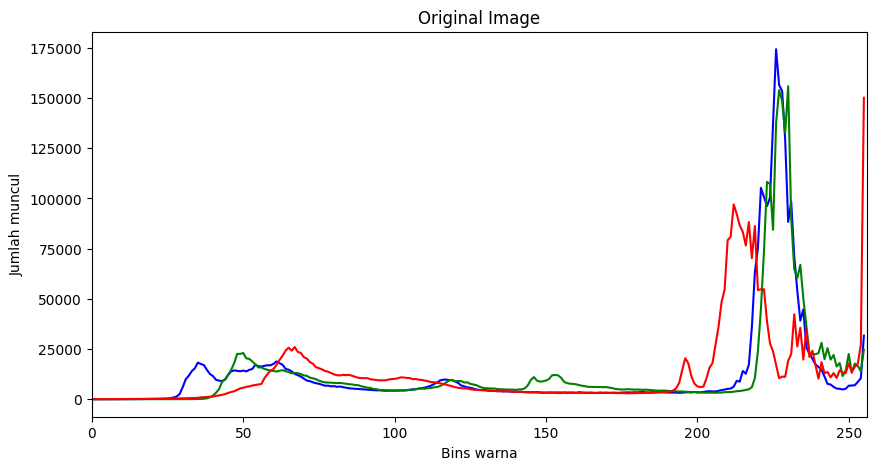

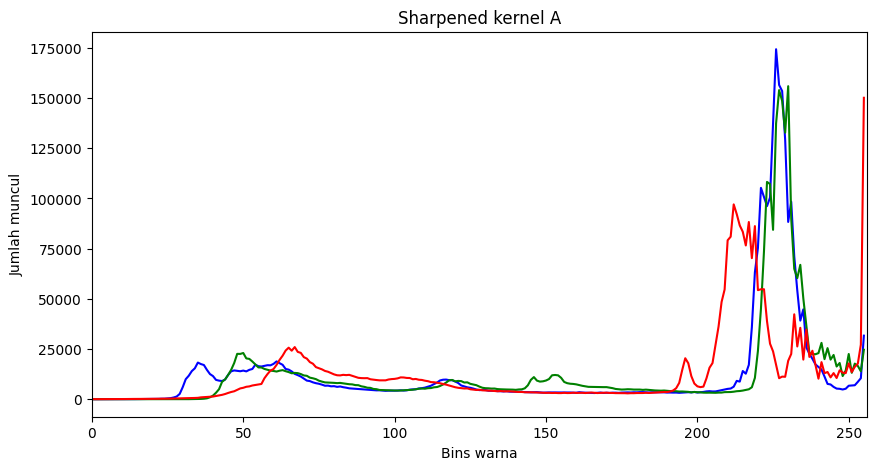

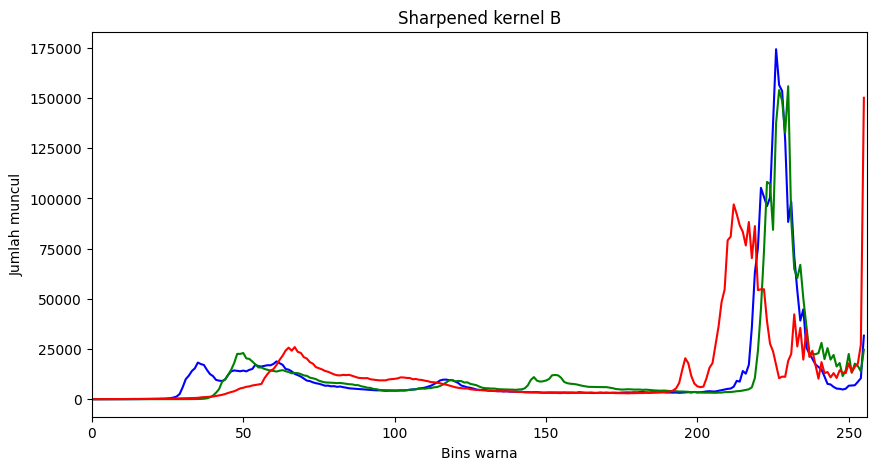

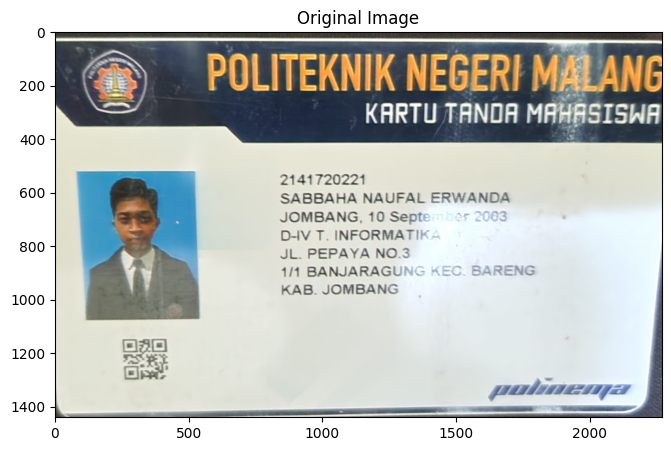

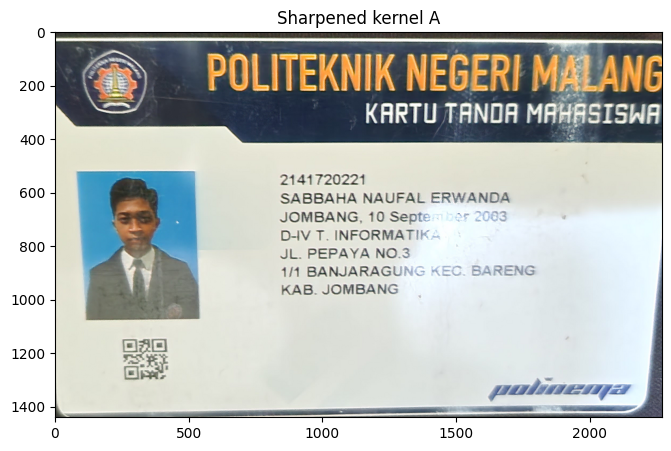

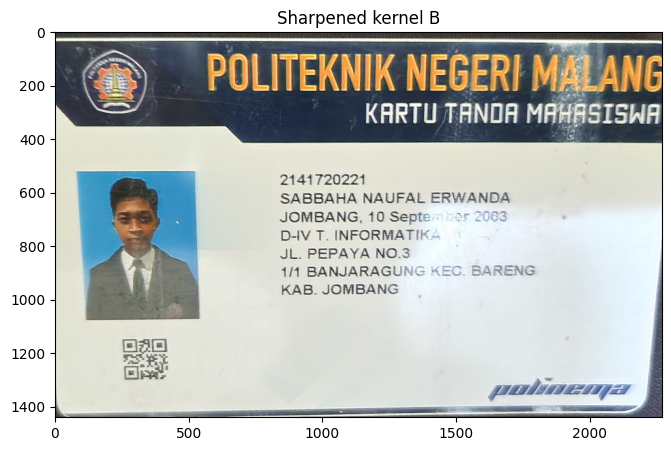

In [4]:
# @title TUGAS PCVK FILTER SPASIAL
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# image = cv2.imread('Sabbaha Naufal.jpg')
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = Image.open('Sabbaha Naufal.jpg')
image = np.array(image)

# Menampilkan citra asli
cropped_image = image[480:1920, 980:3250]

# Pengambilan warna dengan histogram :
def plot_histogram(image, title):
  colors = ("b", "g", "r")
  plt.figure(figsize=(10,5))
  plt.title(title)
  plt.xlabel("Bins warna")
  plt.ylabel("Jumlah muncul")
  for i, warna in enumerate(colors):
      histogram = cv2.calcHist([cropped_image], [i], None, [256], [0, 256])
      plt.plot(histogram, color=warna)
      plt.xlim([0, 256])


# Kernel penajaman (sharpening kernel)
sharpening_kernel_A = np.array([[ 0, -1,  0],
                              [-1,  5, -1],
                              [ 0, -1,  0]])

sharpening_kernel_B = np.array([[ 0, -1,  0],
                              [-1,  5, -1],
                              [ 0, -1,  0]])


# Menerapkan konvolusi
cropped_image_sharpened = cv2.filter2D(cropped_image, -1, sharpening_kernel_A)
cropped_image_sharpened_2 = cv2.filter2D(cropped_image_sharpened, -1, sharpening_kernel_B)
# ambil histogram warna
plot_histogram(cropped_image, "Original Image")
plot_histogram(cropped_image_sharpened, "Sharpened kernel A")
plot_histogram(cropped_image_sharpened_2, "Sharpened kernel B")

# Menampilkan hasil
plt.figure(figsize=(10,5))
plt.title("Original Image")
plt.imshow(cropped_image)
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Sharpened kernel A")
plt.imshow(cropped_image_sharpened)
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Sharpened kernel B")
plt.imshow(cropped_image_sharpened_2)
plt.show()

Filter spasial yang saya gunakan adalah sharpening untuk memperjelas image.

Code di bawah hanya sekedar uji coba.

In [5]:
sharpening_kernel = np.array([[ 0, -1,  0],
                              [-1,  5, -1],
                              [ 0, -1,  0]])

# Fungsi manual konvolusi dengan optimasi vektor
def manual_convolution(image_channel, kernel):
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Padding image
    padded_image = np.pad(image_channel, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    # Menggunakan view 2D sliding window
    output = np.zeros_like(image_channel)

    for y in range(image_channel.shape[0]):
        for x in range(image_channel.shape[1]):
            region = padded_image[y:y + kernel_height, x:x + kernel_width]
            conv_value = np.sum(region * kernel)
            output[y, x] = np.clip(conv_value, 0, 255)

    return output

# Fungsi manual konvolusi untuk RGB
def manual_convolution_rgb(image, kernel):
    r, g, b = image[:, :, 0], image[:, :, 1], image[:, :, 2]

    r_sharpened = manual_convolution(r, kernel)
    g_sharpened = manual_convolution(g, kernel)
    b_sharpened = manual_convolution(b, kernel)

    return np.stack((r_sharpened, g_sharpened, b_sharpened), axis=2)

# Menerapkan konvolusi manual (lebih cepat)
sharpened_image = manual_convolution_rgb(cropped_image, sharpening_kernel)

# Menampilkan hasil
plt.figure(figsize=(10, 5))
plt.title("Original Image")
plt.imshow(cropped_image)
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Sharpened Image (Manual Convolution)")
plt.imshow(sharpened_image.astype(np.uint8))
plt.show()

# Menampilkan histogram
plot_histogram(cropped_image, "Original Image")
plot_histogram(sharpened_image, "Sharpened Image (Manual Convolution)")

KeyboardInterrupt: 

In [6]:
image = Image.open('Sabbaha Naufal.jpg')
image = np.array(image)

if len(image.shape) == 3:
    grayscale_image = np.mean(image, axis=2)
else:
    grayscale_image = image.copy()

# Kernel penajaman (sharpening kernel)
sharpening_kernel = np.array([[ 0, -1,  0],
                              [-1,  5, -1],
                              [ 0, -1,  0]])

# Fungsi konvolusi manual
def manual_convolution(image, kernel):
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape

    output = np.zeros_like(image)

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    # Melakukan konvolusi
    for y in range(img_height):
        for x in range(img_width):
            region = padded_image[y:y+kernel_height, x:x+kernel_width]
            conv_value = np.sum(region * kernel)

            output[y, x] = np.clip(conv_value, 0, 255)

    return output


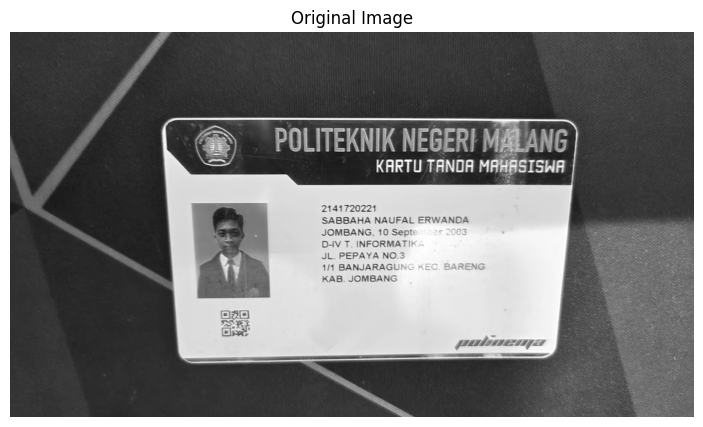

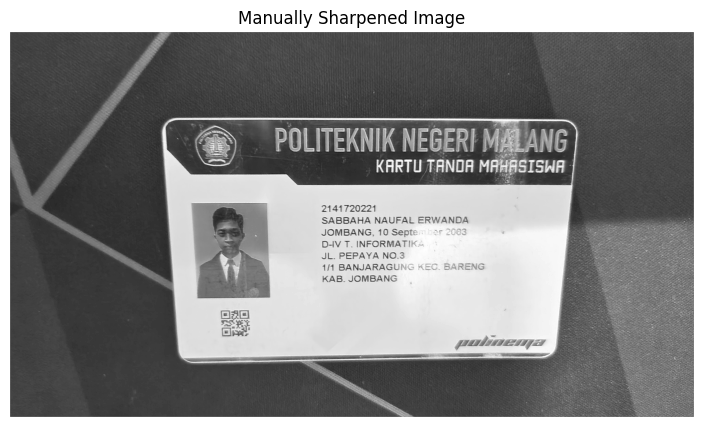

In [7]:
# Menerapkan konvolusi manual dengan sharpening kernel
sharpened_image = manual_convolution(grayscale_image, sharpening_kernel)
sharpened_image2 = manual_convolution(sharpened_image, sharpening_kernel)
# Menampilkan hasil asli dan hasil setelah sharpening
plt.figure(figsize=(10, 5))
plt.title("Original Image")
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Manually Sharpened Image")
plt.imshow(sharpened_image2, cmap='gray')
plt.axis('off')

plt.show()

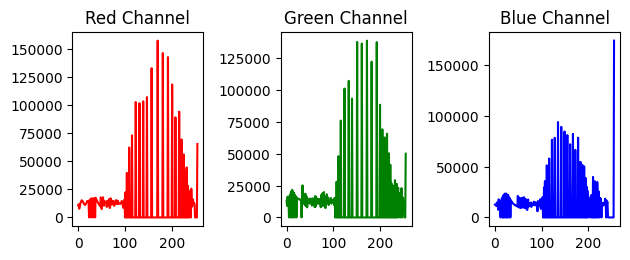

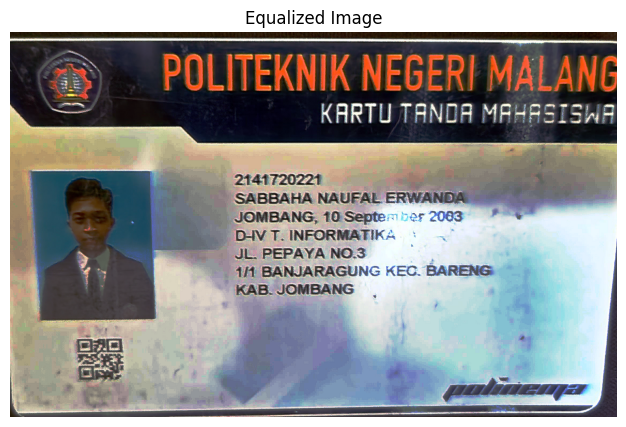

In [9]:
# @title Coba equalization
# cropped_image = image[480:1920, 980:3250]

red_freq, _ = np.histogram(cropped_image_sharpened[:, :, 0], bins=256, range=(0, 256))
green_freq, _ = np.histogram(cropped_image_sharpened[:, :, 1], bins=256, range=(0, 256))
blue_freq, _ = np.histogram(cropped_image_sharpened[:, :, 2], bins=256, range=(0, 256))

red_kumulatif = np.cumsum(red_freq)
green_kumulatif = np.cumsum(green_freq)
blue_kumulatif = np.cumsum(blue_freq)

num_pixel = cropped_image_sharpened.shape[0] * cropped_image_sharpened.shape[1]

red_freq_norm = (red_kumulatif / num_pixel) * 255
green_freq_norm = (green_kumulatif / num_pixel) * 255
blue_freq_norm = (blue_kumulatif / num_pixel) * 255

# memasukkan equalization
red_equalized = red_freq_norm[cropped_image_sharpened[:, :, 0]]
green_equalized = green_freq_norm[cropped_image_sharpened[:, :, 1]]
blue_equalized = blue_freq_norm[cropped_image_sharpened[:, :, 2]]

image_equalized = np.zeros_like(cropped_image_sharpened)
image_equalized[:, :, 0] = red_equalized.astype(np.uint8)
image_equalized[:, :, 1] = green_equalized.astype(np.uint8)
image_equalized[:, :, 2] = blue_equalized.astype(np.uint8)

# Hasil equalization
# > menampilkan histogram hasil
red_freq_eq, _ = np.histogram(image_equalized[:, :, 0], bins=256, range=(0, 256))
green_freq_eq, _ = np.histogram(image_equalized[:, :, 1], bins=256, range=(0, 256))
blue_freq_eq, _ = np.histogram(image_equalized[:, :, 2], bins=256, range=(0, 256))

# Plotting
plt.subplot(2, 3, 4)
plt.plot(red_freq_eq, color='red')
plt.title('Red Channel')

plt.subplot(2, 3, 5)
plt.plot(green_freq_eq, color='green')
plt.title('Green Channel')

plt.subplot(2, 3, 6)
plt.plot(blue_freq_eq, color='blue')
plt.title('Blue Channel')

plt.tight_layout()
plt.show()

# Menampilkan citra sebelum dan sesudah equalization
plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
plt.imshow(cropped_image)
plt.title('Original Image')
plt.axis('off')

# plt.subplot(1, 2, 2)
plt.imshow(image_equalized)
plt.title('Equalized Image')
plt.axis('off')

plt.show()

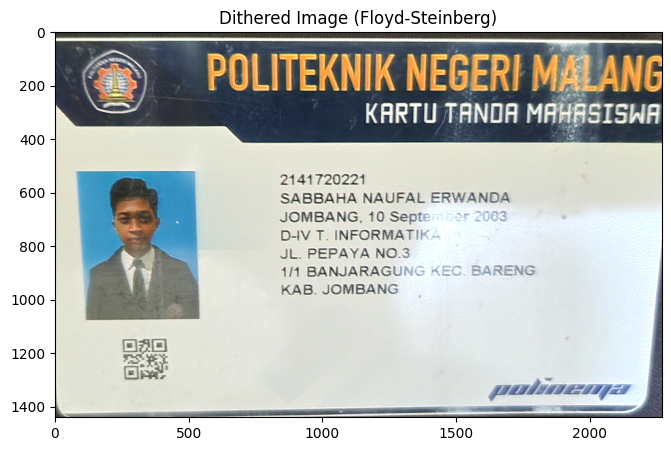

In [13]:
# @title Coba dithering
image = cropped_image_sharpened.astype(np.float32)

height, width, _ = image.shape

# metode floyd
for y in range(height):
    for x in range(width):
        for channel in range(3):  # Loop through R, G, and B channels
            old_pixel = image[y, x, channel]
            new_pixel = 255 if old_pixel > 128 else 0  # Threshold for binary dithering
            image[y, x, channel] = new_pixel
            error = old_pixel - new_pixel

            if x + 1 < width:
                image[y, x + 1, channel] += error * 7 / 16
            if x - 1 >= 0 and y + 1 < height:
                image[y + 1, x - 1, channel] += error * 3 / 16
            if y + 1 < height:
                image[y + 1, x, channel] += error * 5 / 16
            if x + 1 < width and y + 1 < height:
                image[y + 1, x + 1, channel] += error * 1 / 16

image = np.clip(image, 0, 255).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.imshow(cropped_image_sharpened)
plt.imshow(image)
plt.title('Dithered Image (Floyd-Steinberg)')
plt.show()

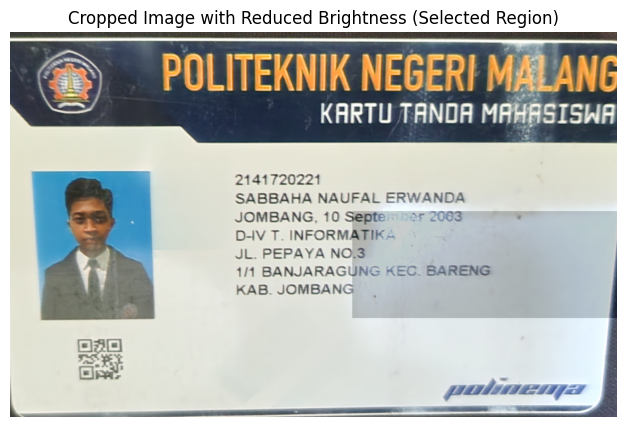

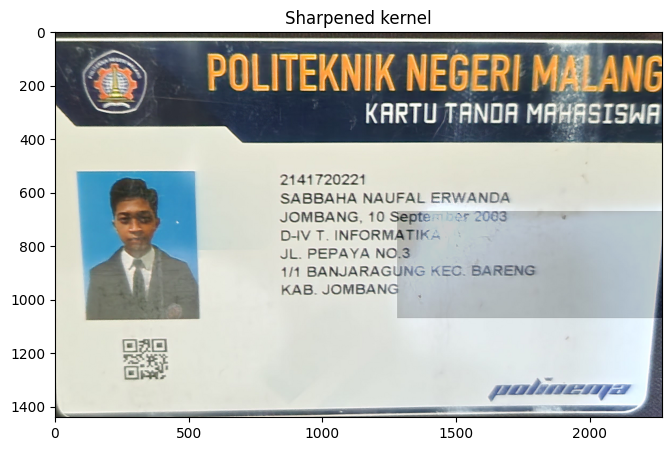

In [15]:

# Menentukan koordinat untuk menurunkan brightness
x_start, x_end = 1280, 2300
y_start, y_end = 670, 1070

# Copy cropped image agar tidak mempengaruhi data asli
cropped_image_with_brightness = cropped_image.copy()

# Mengambil bagian citra yang ingin diturunkan brightness-nya
cropped_region = cropped_image_with_brightness[y_start:y_end, x_start:x_end]

# Menurunkan brightness dengan mengurangi nilai pixel (misal mengurangi 50)
brightness_reduction_value = 50
cropped_region = np.clip(cropped_region - brightness_reduction_value, 0, 255)

# Mengembalikan bagian yang telah diubah ke citra
cropped_image_with_brightness[y_start:y_end, x_start:x_end] = cropped_region


sharpening_kernel_B = np.array([[ 0, -1,  0],
                              [-1,  5, -1],
                              [ 0, -1,  0]])

# Menerapkan konvolusi penajaman pada cropped image
cropped_image_sharpened_2 = cv2.filter2D(cropped_image_with_brightness, -1, sharpening_kernel_B)



# Menampilkan citra setelah penurunan brightness
plt.figure(figsize=(10, 5))
plt.title("Cropped Image with Reduced Brightness (Selected Region)")
plt.imshow(cropped_image_with_brightness)
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Sharpened kernel")
plt.imshow(cropped_image_sharpened_2)
plt.show()

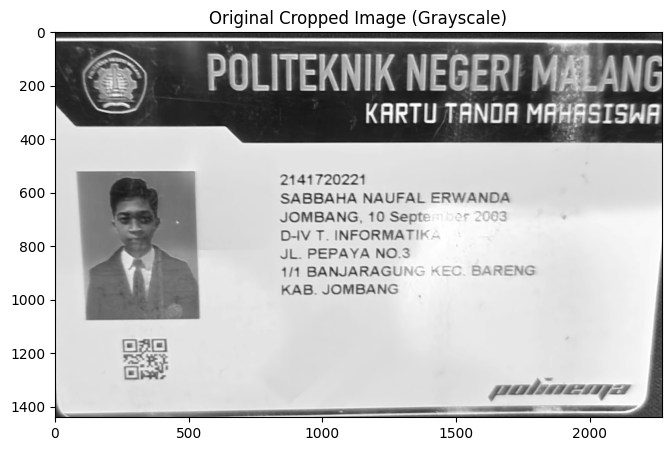

In [14]:
# @title COBA GAUS BLURR
import numpy as np
import cv2
import matplotlib.pyplot as plt

def gaussian_kernel(size, sigma=1):
    k = np.zeros((size, size), dtype=np.float32)
    center = size // 2

    for x in range(size):
        for y in range(size):
            diff = (x - center)**2 + (y - center)**2
            k[x, y] = np.exp(diff / (2 * sigma**2))

    return k / np.sum(k)

# Fungsi untuk melakukan konvolusi
def manual_convolution(image, kernel):
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape

    output = np.zeros_like(image)

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Melakukan padding pada gambar
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    for y in range(img_height):
        for x in range(img_width):
            region = padded_image[y:y + kernel_height, x:x + kernel_width]

            output[y, x] = np.clip(np.sum(region * kernel), 0, 255)

    return output.astype(np.uint8)

# /////////////////////////////////////////////////////////
image = cv2.imread('Sabbaha Naufal.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cropped_image = image[480:1920, 980:3250]
gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2GRAY)


gaussian_kernel_5x5 = gaussian_kernel(5, sigma=5)
blurred_image = manual_convolution(gray_image, gaussian_kernel_5x5)
sharpened_image = manual_convolution(gray_image, sharpening_kernel)

image_equalized_sharpened = manual_convolution(image_equalized, sharpening_kernel)
# Result
plt.figure(figsize=(10, 5))
plt.title("Original Cropped Image (Grayscale)")
plt.imshow(gray_image, cmap='gray')
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Gaussian Blurred Image")
plt.imshow(blurred_image, cmap='gray')
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Sharpening Image")
plt.imshow(sharpened_image, cmap='gray')
plt.show()


In [22]:
image_equalized_sharpened = cv2.filter2D(image_equalized, -1, sharpening_kernel)
plt.imshow(image_equalized_sharpened)
plt.show()
plt.imshow(image)
plt.show()

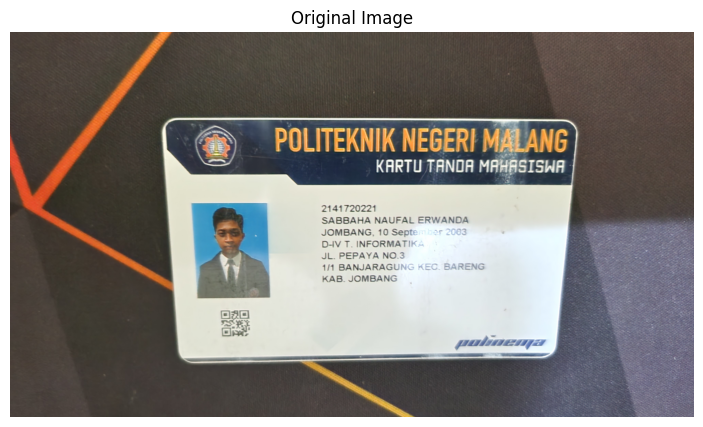

In [23]:

def manual_convolution_rgb(image, kernel):
    r, g, b = image[:, :, 0], image[:, :, 1], image[:, :, 2]

    r_convolved = manual_convolution(r, kernel)
    g_convolved = manual_convolution(g, kernel)
    b_convolved = manual_convolution(b, kernel)

    convolved_image_rgb = np.stack((r_convolved, g_convolved, b_convolved), axis=2)
    return convolved_image_rgb

def manual_convolution(image, kernel):
    """Fungsi untuk melakukan konvolusi secara manual."""
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape

    output = np.zeros_like(image)

    # Padding image untuk kernel
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    # Melakukan konvolusi
    for y in range(img_height):
        for x in range(img_width):
            region = padded_image[y:y + kernel_height, x:x + kernel_width]

            conv_value = np.sum(region * kernel)
            output[y, x] = np.clip(conv_value, 0, 255)

    return output

sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])

image = np.array(image)
image_equalized_sharpened2 = manual_convolution_rgb(image_equalized, sharpening_kernel)

# Menampilkan hasil
plt.figure(figsize=(10, 5))
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')
plt.show()

plt.title("Equalized and Sharpened Image")
plt.imshow(image_equalized_sharpened2.astype(np.uint8))
plt.axis('off')
plt.show()
